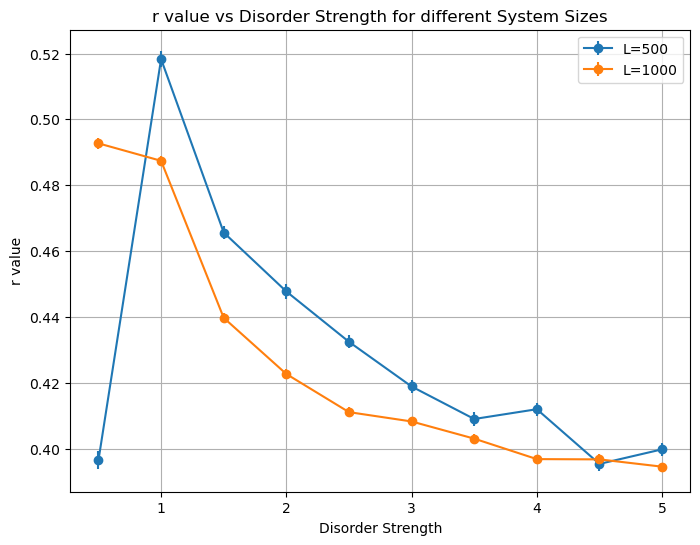

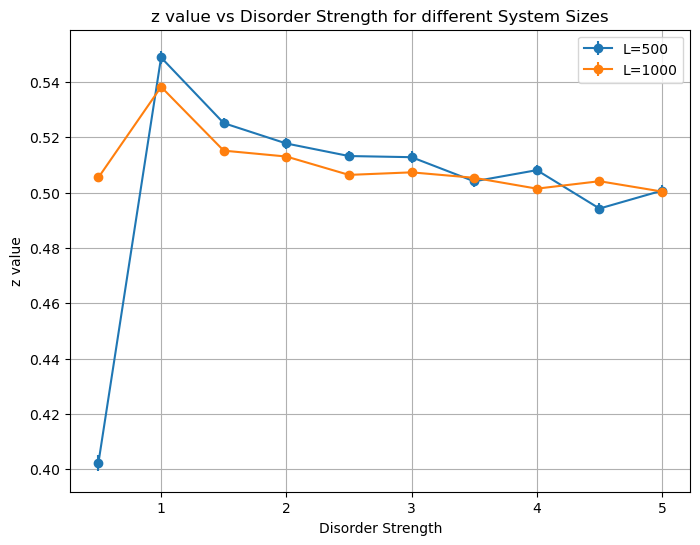

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Open the saved results and plot them
data = np.load("../data/1dAnderson_rz_results_Lmax1000_iters500OO.npz")
L_values = data['L_values']
disorder_values = data['disorder_values']
r_results = data['r_results']
z_results = data['z_results']
num_iter = r_results.shape[2]



figr, axr = plt.subplots(figsize=(8,6))
for i,L in enumerate(L_values):
    r_vals = [r_results[i][j].mean() for j in range(len(disorder_values))]
    r_stderr = [r_results[i][j].std()/np.sqrt(num_iter) for j in range(len(disorder_values))]
    axr.errorbar(disorder_values,r_vals,yerr=r_stderr,label=f"L={L}",marker='o',capthick=2)
    #disorders = [disorder for disorder, mean, stdev in results[i]]
    #r_values = [mean for disorder, mean, stdev in results[i]]
    #stderr_values = [stdev/np.sqrt(num_iter) for disorder, mean, stdev in results[i]]
    #plt.errorbar(disorders,r_values,yerr=stderr_values,label=f"L={L}",marker='o',capthick=2)

axr.set_xlabel("Disorder Strength")
axr.set_ylabel("r value")
axr.set_title("r value vs Disorder Strength for different System Sizes")
axr.legend()
axr.grid()
figr.savefig(f"1dAnderson_r_vs_disorder_Lmax{L_values[-1]}.png",dpi=300)

figz, axz = plt.subplots(figsize=(8,6))
for i,L in enumerate(L_values):
    z_vals = [z_results[i][j].mean() for j in range(len(disorder_values))]
    z_stderr = [z_results[i][j].std()/np.sqrt(num_iter) for j in range(len(disorder_values))]
    axz.errorbar(disorder_values,z_vals,yerr=z_stderr,label=f"L={L}",marker='o',capthick=2)

axz.set_xlabel("Disorder Strength")
axz.set_ylabel("z value")
axz.set_title("z value vs Disorder Strength for different System Sizes")
axz.legend()
axz.grid()
figz.savefig(f"1dAnderson_z_vs_disorder_Lmax{L_values[-1]}.png",dpi=300)

plt.show()


In [2]:

import sys
sys.path.append('../src')
from SLmodels import *

# Test that the 3D model initializes correctly
m = ThreeDimensionalAnderson(L=5, disorder=10.0, rho=30.0, kappa=0.1)

# Check that X is a list of 3 operators
assert isinstance(m.X, list), "X should be a list"
assert len(m.X) == 3, "X should have 3 elements for 3D"

# Check shapes
assert m.X[0].shape == (125, 125), "X shape should be L^3 x L^3"
assert m.H.shape == (125, 125), "H shape should be L^3 x L^3"
print(m.SL.shape)
assert m.SL.shape == (250, 250), "SL shape should be 2L^3 x 2L^3"

print("3D Anderson model initialized successfully!")

(500, 500)


AssertionError: SL shape should be 2L^3 x 2L^3